# **Checkpoint 3**

# **Dataset ini diperoleh dari Kaggle-klasifikasi berat badan anak.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/praktikum avd/BMIData.csv")

In [ ]:
df

,SchoolYear,NameHospital,Sex,EpiUnderweight,EpiHealthyWeight,EpiOverweight,EpiObese,EpiOverweightAndObese,ValidCounts,UnvalidCounts,TotalCounts
0,2001,Borders,Female,2,334,54,28,82,418,82,500
1,2001,Borders,Male,5,301,63,42,105,411,105,516
2,2001,Lothian,Female,12,728,133,106,239,979,239,1218
3,2001,Lothian,Male,17,681,124,114,238,936,238,1174
4,2001,Fife,Female,17,1361,231,155,386,1764,386,2150
...,...,...,...,...,...,...,...,...,...,...,...
511,2023,Tayside,Male,15,1201,216,178,394,1610,394,2004
512,2023,Greater Glasgow and Clyde,Female,34,4097,595,561,1156,5287,1156,6443
513,2023,Greater Glasgow and Clyde,Male,89,4152,615,641,1256,5497,1256,6753
514,2023,Lanarkshire,Female,14,2255,381,330,711,2980,711,3691


# **1. Visualisasi Data yang Relevan dengan Business Understanding**

**1. Tren BMI dari Tahun ke Tahun**

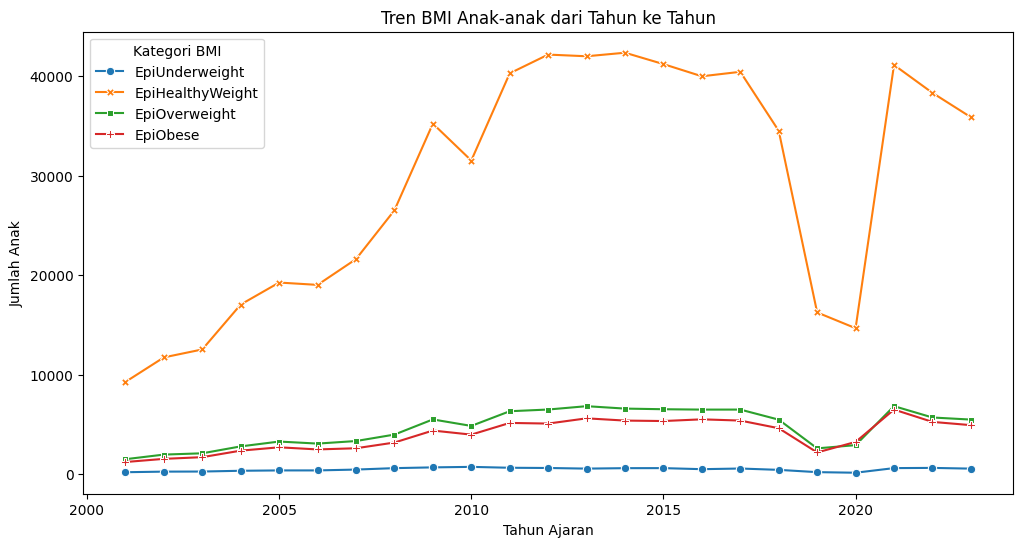

In [ ]:
bmi_trend = df.groupby("SchoolYear")[["EpiUnderweight", "EpiHealthyWeight", "EpiOverweight", "EpiObese"]].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=bmi_trend, markers=True, dashes=False)
plt.title("Tren BMI Anak-anak dari Tahun ke Tahun")
plt.xlabel("Tahun Ajaran")
plt.ylabel("Jumlah Anak")
plt.legend(title="Kategori BMI")
plt.show()

**2. Mengidentifikasi perbedaan distribusi BMI berdasarkan jenis kelamin.**

<Figure size 1000x500 with 0 Axes>

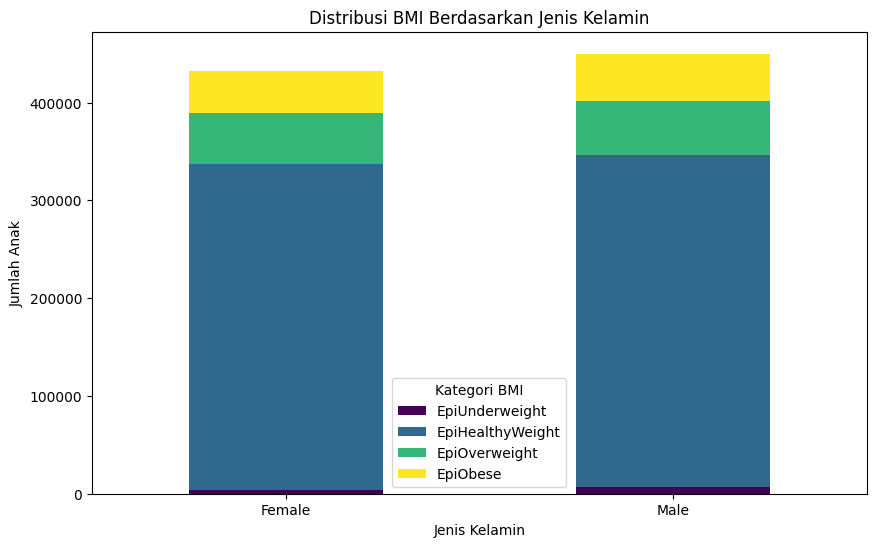

In [ ]:
bmi_by_sex = df.groupby("Sex")[["EpiUnderweight", "EpiHealthyWeight", "EpiOverweight", "EpiObese"]].sum()

plt.figure(figsize=(10, 5))
bmi_by_sex.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Distribusi BMI Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Anak")
plt.xticks(rotation=0)
plt.legend(title="Kategori BMI")
plt.show()

**3.  Menentukan Rumah Sakit atau Wilayah dengan Tingkat Obesitas atau Kekurangan Gizi Tertinggil**

<Figure size 1200x600 with 0 Axes>

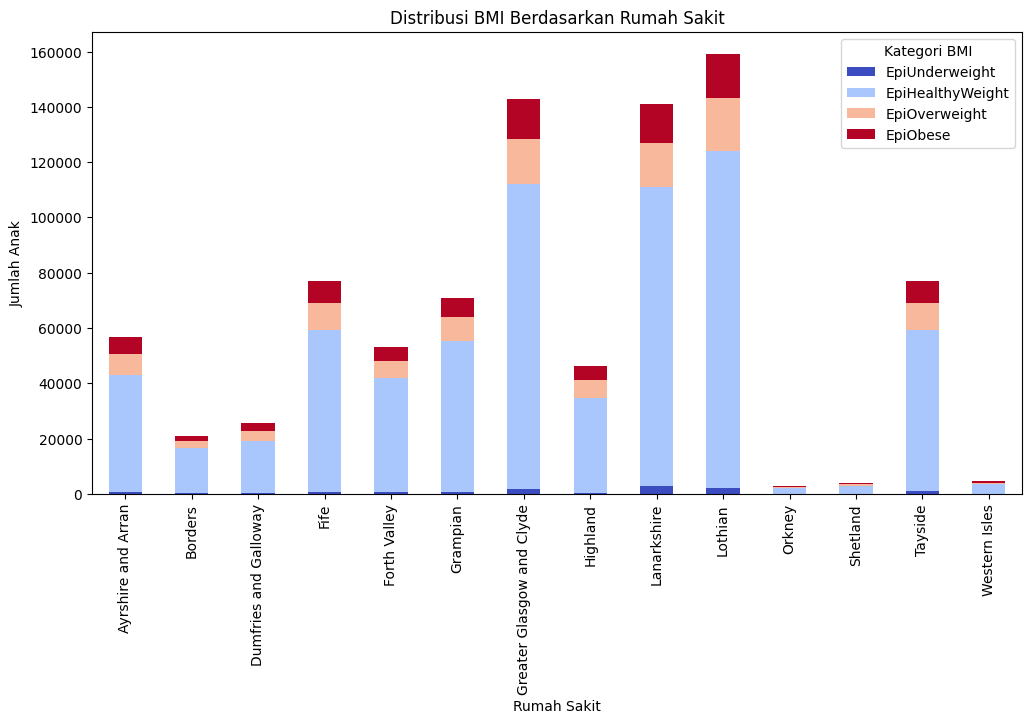

In [ ]:
bmi_by_hospital = df.groupby("NameHospital")[["EpiUnderweight", "EpiHealthyWeight", "EpiOverweight", "EpiObese"]].sum()
plt.figure(figsize=(12, 6))
bmi_by_hospital.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Distribusi BMI Berdasarkan Rumah Sakit")
plt.xlabel("Rumah Sakit")
plt.ylabel("Jumlah Anak")
plt.xticks(rotation=90)
plt.legend(title="Kategori BMI")
plt.show()

**4.  Evaluasi Validitas Data dan Pola Data Tidak Valid**

<Figure size 1200x600 with 0 Axes>

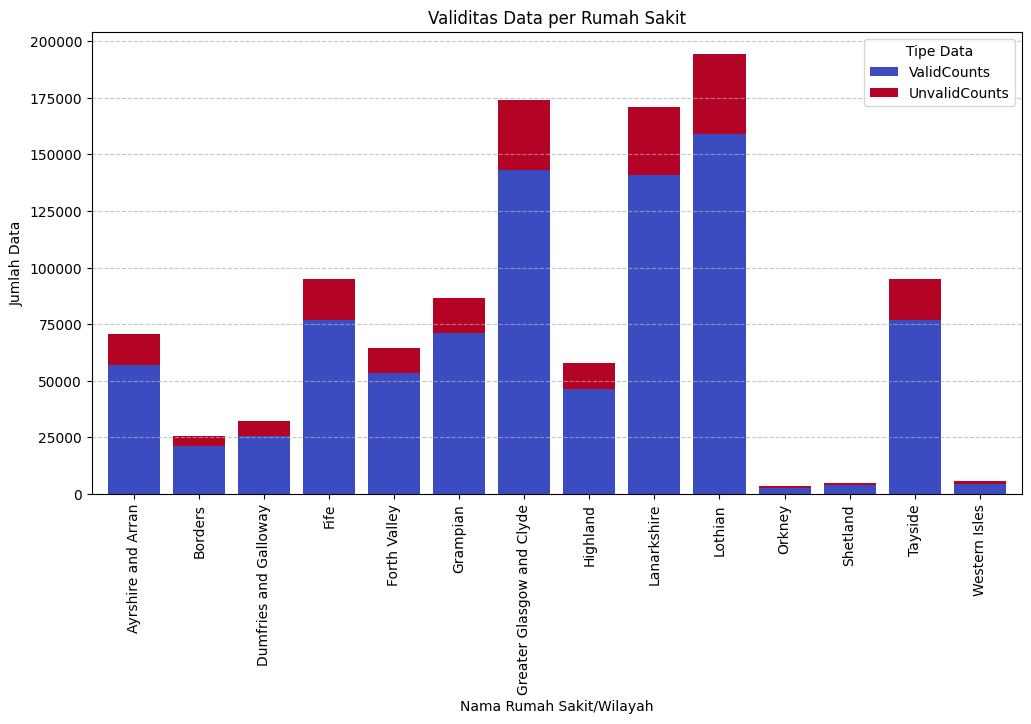

In [ ]:

validity_data = df.groupby("NameHospital")[["ValidCounts", "UnvalidCounts"]].sum()

plt.figure(figsize=(12, 6))
validity_data.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", width=0.8)
plt.title("Validitas Data per Rumah Sakit")
plt.xlabel("Nama Rumah Sakit/Wilayah")
plt.ylabel("Jumlah Data")
plt.xticks(rotation=90)
plt.legend(title="Tipe Data")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**5. Wawasan untuk Intervensi Kesehatan**

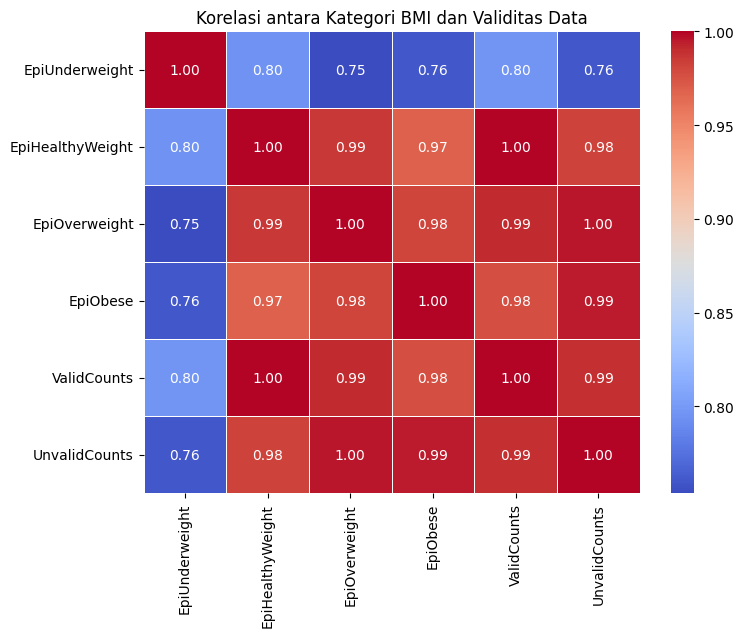

In [ ]:
correlation_matrix = df[["EpiUnderweight", "EpiHealthyWeight", "EpiOverweight", "EpiObese", "ValidCounts", "UnvalidCounts"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Kategori BMI dan Validitas Data")
plt.show()


# **2 .insight dan tindakan yang dapat diambil berdasarkan hasil visualisasi yang dibuat**

**1.Tren BMI dari Tahun ke Tahun**

 * Grafik menunjukkan perubahan jumlah anak dalam setiap kategori BMI dari tahun ke tahun.

 * Jika tren obesitas atau underweight meningkat, maka perlu intervensi kesehatan.


**2.Mengidentifikasi perbedaan distribusi BMI berdasarkan jenis kelamin.**

 * Grafik menunjukkan distribusi BMI antara anak laki-laki dan perempuan.

 * Jika ada perbedaan signifikan, maka kampanye kesehatan berbasis gender diperlukan.

**3. Menentukan Rumah Sakit atau Wilayah dengan Tingkat Obesitas atau Kekurangan Gizi Tertinggil**

* Grafik menunjukkan jumlah anak dengan kategori BMI berbeda di setiap rumah sakit.

* Jika obesitas atau underweight lebih tinggi di wilayah tertentu, maka intervensi lokal diperlukan.

**4.Validitas Data per Rumah Sakit**

 * Grafik membandingkan jumlah data valid dan tidak valid di setiap rumah sakit.

 * Jika ada banyak data tidak valid, maka perlu audit dan pelatihan pencatatan.

**5.Wawasan untuk Intervensi Kesehatan**

* Heatmap menunjukkan hubungan antara obesitas, underweight, dan validitas data.

* Jika korelasi tinggi antara data tidak valid dan BMI tertentu, maka investigasi lebih lanjut dibutuhkan.